#**Trabalhando com Planilhas do Excel**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importando a biblioteca
import pandas as pd

In [3]:
#Leitura dos arquivos
df1 = pd.read_excel("/content/drive/MyDrive/DIO - Unimed BH - Análise de Dados com Python e Pandas/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/DIO - Unimed BH - Análise de Dados com Python e Pandas/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/DIO - Unimed BH - Análise de Dados com Python e Pandas/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/DIO - Unimed BH - Análise de Dados com Python e Pandas/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/DIO - Unimed BH - Análise de Dados com Python e Pandas/datasets/Salvador.xlsx")

In [4]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [5]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [6]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
#Exibindo as 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [8]:
df.sample(5) #Amostra de 5 linhas aleatótias

,Cidade,Data,Vendas,LojaID,Qtde
47,Salvador,2019-01-01,190.03,1036,2
107,Natal,2019-01-02,14.70,1035,1
9,Recife,2019-01-01,11.85,980,7
198,Salvador,2019-01-02,13.65,1037,3
92,Fortaleza,2019-01-01,3.49,1005,4


In [9]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [10]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [11]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [12]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


**Tratando valores faltantes**

In [13]:
#Consultando linhas com valores faltantes, null,
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [14]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True) #implace=True -> Substituição em memória

In [15]:
df["Vendas"].mean()

122.61180089485458

In [16]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [17]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
3,Aracaju,2018-01-01,3.01,1521,7
101,Natal,2019-01-02,32.28,1035,3
135,Fortaleza,2019-03-02,10.79,983,5
149,Salvador,2019-01-02,22.38,1034,3
76,Aracaju,2018-01-01,33.51,1523,4
104,Salvador,2019-01-01,188.79,1036,3
99,Recife,2019-01-01,136.72,980,4
62,Aracaju,2018-01-01,28.66,1520,3
13,Salvador,2019-02-12,39.29,1035,1
219,Natal,2019-01-02,19.67,1037,2


In [18]:
#Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [19]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [20]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [21]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

**Criando colunas novas**

In [22]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [23]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [24]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"] #Caso não existisse a coluna Qtde

In [25]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [26]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [27]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [28]:
#nlargest
df.nlargest(3, "Receita") #retorna os 3 itens com maiores valores na colula Receita

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [29]:
#nsamllest
df.nsmallest(3, "Receita") #retorna os 3 itens com menores valores na colula Receita

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [30]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [31]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10) #ascending=False, para exibir do maior para o menor

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


#**Trabalhando com datas**

In [48]:
#Trasnformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [49]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade                      object
Data                         int64
Vendas                     float64
LojaID                      object
Qtde                         int64
Receita                    float64
Receita/Vendas             float64
Ano_Venda                    int64
mes_venda                    int64
dia_venda                    int64
diferenca_dias     timedelta64[ns]
trimestre_venda              int64
dtype: object

In [50]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [51]:
df.dtypes

Cidade                      object
Data                datetime64[ns]
Vendas                     float64
LojaID                      object
Qtde                         int64
Receita                    float64
Receita/Vendas             float64
Ano_Venda                    int64
mes_venda                    int64
dia_venda                    int64
diferenca_dias     timedelta64[ns]
trimestre_venda              int64
dtype: object

In [52]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [53]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [54]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
90,Fortaleza,2019-01-01,18.01,1005,2,36.02,2.0,2019,1,1,365 days,1
22,Aracaju,2018-01-01,150.94,1522,1,150.94,1.0,2018,1,1,0 days,1
6,Natal,2018-07-02,322.00,852,4,1288.00,4.0,2018,7,2,182 days,3
98,Natal,2019-01-02,231.76,1036,3,695.28,3.0,2019,1,2,366 days,1
78,Salvador,2019-01-01,111.20,1036,3,333.60,3.0,2019,1,1,365 days,1


In [55]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [56]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
101,Aracaju,2018-01-01,16.62,1520,9,149.58,9.0,2018,1,1,0 days,1
136,Natal,2019-01-02,13.81,1036,1,13.81,1.0,2019,1,2,366 days,1
100,Aracaju,2018-01-01,180.57,1520,6,1083.42,6.0,2018,1,1,0 days,1
143,Salvador,2019-01-02,41.18,1037,2,82.36,2.0,2019,1,2,366 days,1
115,Aracaju,2018-01-01,50.99,1522,10,509.90,10.0,2018,1,1,0 days,1


In [57]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [58]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [59]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
101,Natal,2019-01-02,32.28,1035,3,96.84,3.0,2019,1,2,366 days,1
103,Recife,2019-01-01,41.65,982,3,124.95,3.0,2019,1,1,365 days,1
133,Fortaleza,2019-03-02,14.67,980,7,102.69,7.0,2019,3,2,425 days,1
58,Natal,2018-12-23,272.00,853,3,816.00,3.0,2018,12,23,356 days,4
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1


In [60]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [61]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
46,Natal,2019-03-26,753.00,853,2,1506.00,2.0,2019,3,26,449 days,1
138,Fortaleza,2019-03-02,150.38,983,6,902.28,6.0,2019,3,2,425 days,1
216,Salvador,2019-01-02,5.82,1035,1,5.82,1.0,2019,1,2,366 days,1
20,Recife,2019-01-01,42.35,982,3,127.05,3.0,2019,1,1,365 days,1
33,Aracaju,2018-01-01,35.09,1523,4,140.36,4.0,2018,1,1,0 days,1


In [62]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [63]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
115,Fortaleza,2019-03-02,12.23,981,3,36.69,3.0,2019,3,2,425 days,1
135,Fortaleza,2019-03-02,10.79,983,5,53.95,5.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
136,Fortaleza,2019-03-02,39.09,982,4,156.36,4.0,2019,3,2,425 days,1
137,Fortaleza,2019-03-02,51.99,983,3,155.97,3.0,2019,3,2,425 days,1
2,Natal,2019-03-11,308.00,852,3,924.00,3.0,2019,3,11,434 days,1
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
66,Natal,2019-03-24,559.00,853,2,1118.00,2.0,2019,3,24,447 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1
132,Fortaleza,2019-03-02,17.49,983,5,87.45,5.0,2019,3,2,425 days,1


# **Visualização de dados**

In [64]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

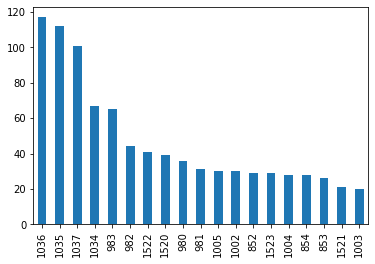

In [65]:
# Gráfico de barras
df['LojaID'].value_counts(ascending=False).plot.bar()

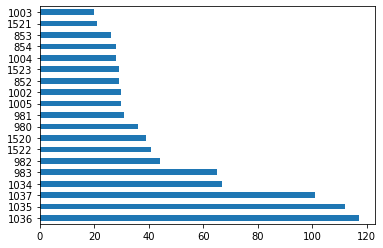

In [66]:
df['LojaID'].value_counts().plot.barh()

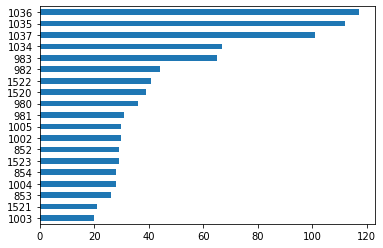

In [67]:
df['LojaID'].value_counts(ascending=True).plot.barh()

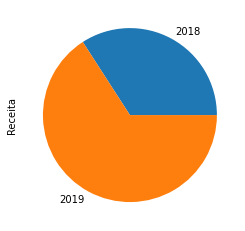

In [70]:
#Gráfico de Pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [71]:
# Total de vendas por cidades
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total Vendas')

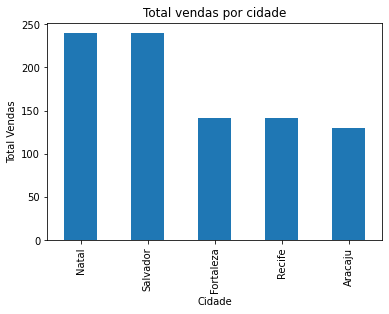

In [72]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title="Total vendas por cidade")
plt.xlabel('Cidade')
plt.ylabel('Total Vendas')

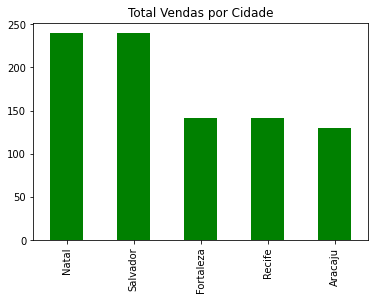

In [74]:
# Alterando a cor padrão 
df['Cidade'].value_counts().plot.bar(title="Total Vendas por Cidade", color="green")


In [75]:
# Alterando Stilo
plt.style.use("ggplot")

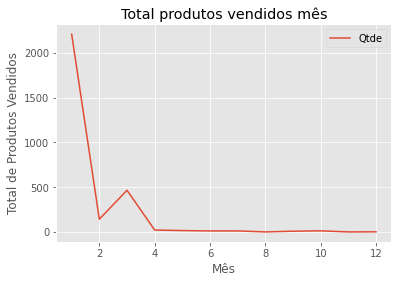

In [81]:
df.groupby(df['mes_venda'])["Qtde"].sum().plot(title="Total produtos vendidos mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend()

In [82]:
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [83]:
# Selecionando vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

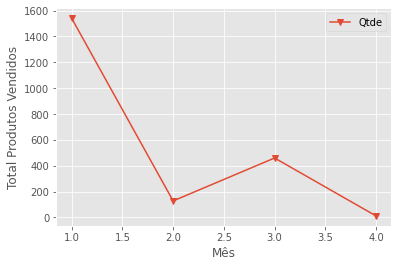

In [85]:
# Total de produtos vendimos por mês em 2019
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'v')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend()

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

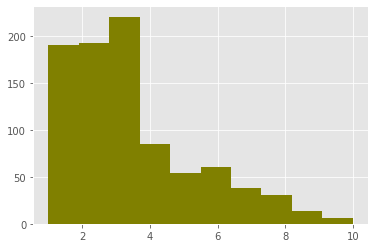

In [91]:
# Histograma
plt.hist(df['Qtde'], color="olive")

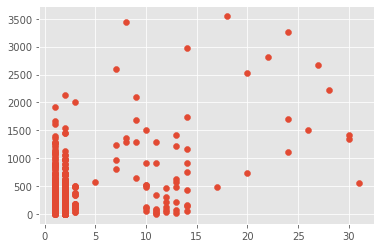

In [94]:
# Gráfico de dispersão
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"])

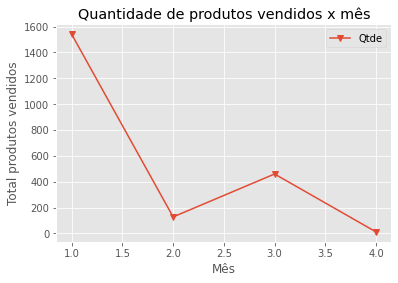

In [95]:
# Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend()
plt.savefig("gráfico QTDE x MES.png")